# Glossary
### 1. Import Libraries
### 2. Import File
### 3. Creating subdatasets
### 4. Heatmap of Correlations AKA Correlation Matrix
### 5. ScatterPlots
### 6. Pairplot
### 7. Categorical Plots

## 1. Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import os
%matplotlib inline

## 2. Import File

In [2]:
path = r'C:\Users\Nuno\05-2024 AirBnB Amsterdam Analysis'
df_listings = pd.read_csv(os.path.join(path,'02 Data','Prepared Data','df_listings_details_cleaned.csv'))

In [3]:
df_listings.columns

Index(['Unnamed: 0', 'id', 'host_id', 'host_since', 'host_is_superhost',
       'host_listings_count', 'neighbourhood_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bedrooms', 'beds', 'bed_type', 'amenities', 'price', 'guests_included',
       'extra_people', 'minimum_nights', 'maximum_nights', 'has_availability',
       'availability_30', 'availability_60', 'availability_90',
       'availability_365', 'number_of_reviews', 'cancellation_policy',
       'calculated_host_listings_count'],
      dtype='object')

## 3. Creating subdatasets

In [4]:
sub_columns =  ['accommodates', 'bathrooms',
               'bedrooms', 'beds', 'price', 'guests_included',
               'extra_people', 'minimum_nights', 'maximum_nights',
                'availability_365', 'number_of_reviews',
               'calculated_host_listings_count']

In [5]:
listings_sub = df_listings[sub_columns]

In [6]:
listings_sub

,accommodates,bathrooms,bedrooms,beds,price,guests_included,extra_people,minimum_nights,maximum_nights,availability_365,number_of_reviews,calculated_host_listings_count
0,2,1.5,1.0,2.0,59.0,1,20.0,3,15,44,248,1
1,5,1.0,2.0,2.0,160.0,2,15.0,4,20,47,42,1
2,2,1.0,1.0,1.0,80.0,2,0.0,1,1000,198,233,2
3,3,1.0,1.0,1.0,125.0,2,10.0,14,60,141,1,2
4,2,1.0,1.0,1.0,150.0,1,0.0,2,730,199,171,1
...,...,...,...,...,...,...,...,...,...,...,...,...
19967,4,2.0,3.0,4.0,340.0,1,0.0,7,12,11,0,1
19968,3,1.0,2.0,3.0,150.0,1,0.0,3,14,16,0,2
19969,2,1.0,1.0,1.0,80.0,1,0.0,10,22,210,0,2
19970,2,1.0,1.0,1.0,55.0,1,0.0,2,15,31,0,2


## 4. Heatmap of Correlations AKA Correlation Matrix

Text(0.5, 1.0, 'Correlation Matrix for AirBnB Dataset')

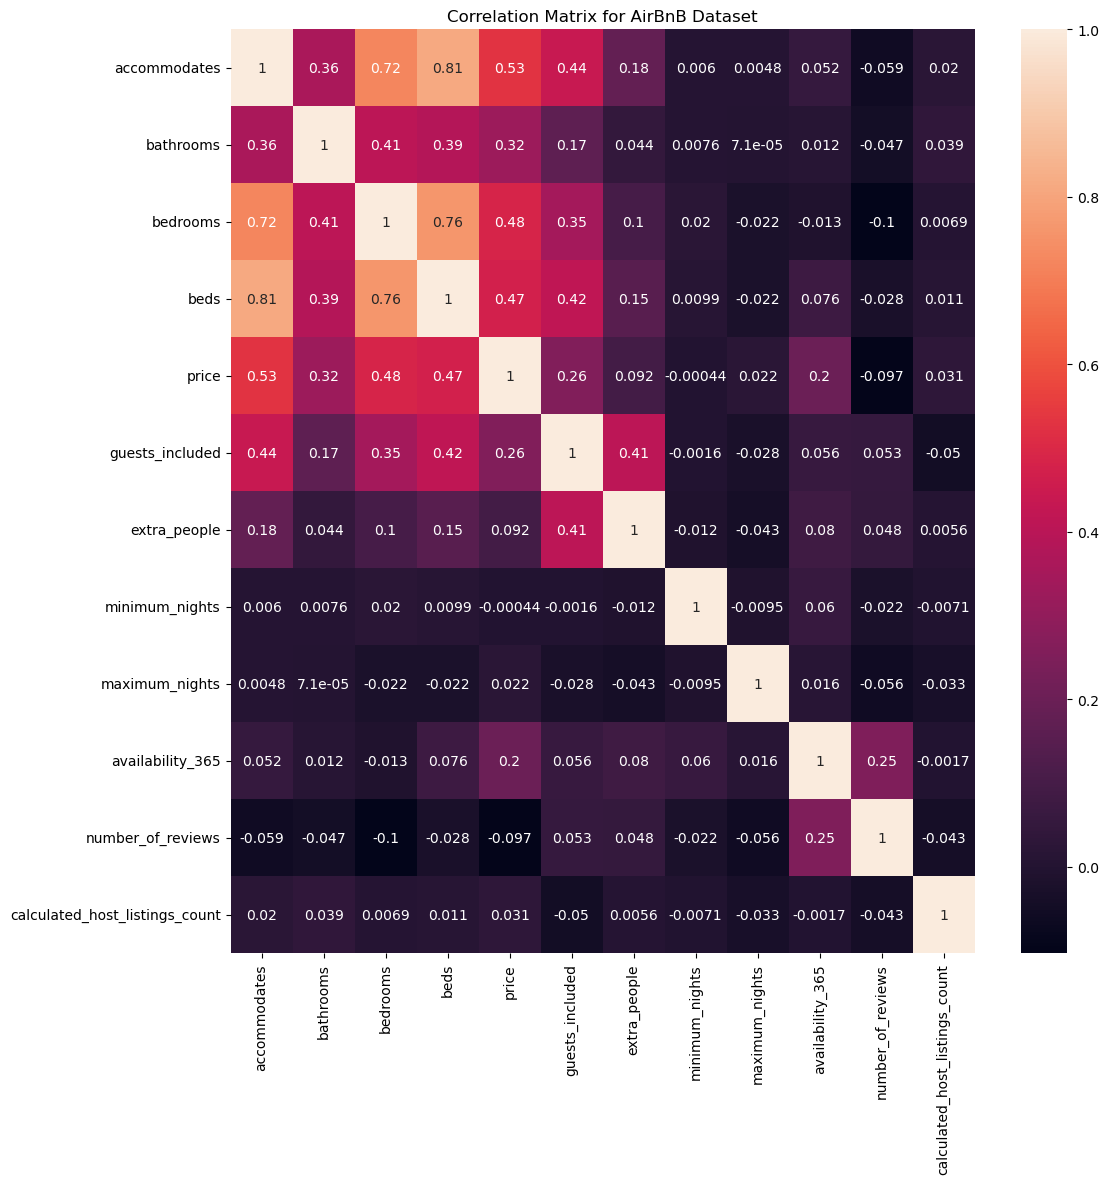

In [7]:
plt.subplots(figsize=(12,12))
sns.heatmap(listings_sub.corr(),annot = True)
plt.title('Correlation Matrix for AirBnB Dataset')

In [9]:
#Saving correlation table
corr_table = listings_sub.corr()

In [11]:
# Exporting correlation table for further analysis
corr_table.to_csv(os.path.join(path,'02 Data','Prepared Data','correlation_table.csv'))

If we ignore the clusters of correlation between the diferent availability variables, as well as the logical correlation between the number of beds/people accomodated/bedrooms/guests included, we can see that there are some correlations of note.

Price is highly correlated with beds/people accomodated/bedrooms and weekly correlated with all the availability variables and the number of guests included. This means, houses with higher prices seem to correlate to higher numbers of beds/people accomodated/bedrooms and also slightly more availability/guests included.

The number of guest included is also moderately correlated with the price for extra guests. This means houses with more guests included in the base price have a higer cost for extra guests.

Curiously, the number of reviews is weakly correlated to the availability for the next year, so houses with more reviews seem to have a higher availability


## 5. ScatterPlots

Text(0.5, 1.0, 'Price vs number of guests accommodated')

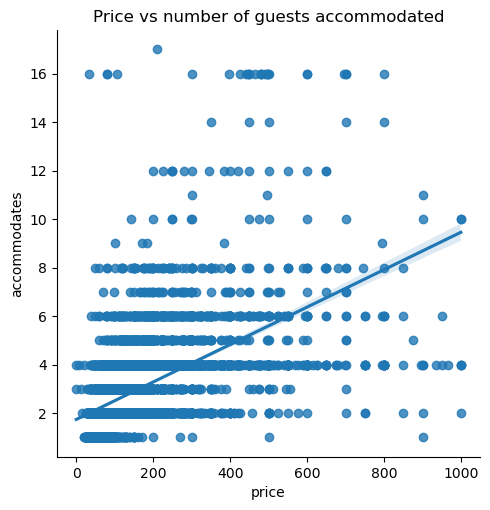

In [26]:
sns.lmplot(data=listings_sub,x='price',y ='accommodates')
plt.title('Price vs number of guests accommodated')

While when looking at the data for the number of people a listing accommodates versus the listing price in a linear manner shows a moderate positive correlation, we can see that a lot of the points are very distant from the line. This is due to the discrete nature of the accomodates variable, as well as the existence of some outliers that accomodate high numbers of people at low prices. One possible way to look further into this data would be to remove entries for price equal to 0, and understand also the boundaries out of which we should remove outliers.

Text(0.5, 1.0, 'Guests Included in base price vs extra fee per guest')

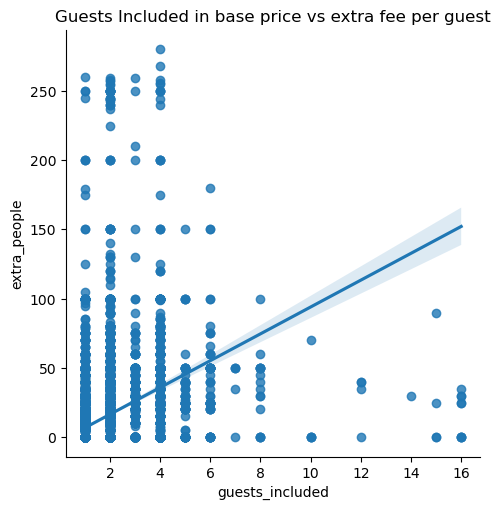

In [27]:
sns.lmplot(data=listings_sub,x='guests_included',y ='extra_people')
plt.title('Guests Included in base price vs extra fee per guest')

Similar to the other plot, here the linear fit of the model is not the best one, and the trend of increasing price for extra guests with the increase of guest included in the base price is more due to the lack of low to no price for extra guests at low guests_included numbers. In fact, there seems to be a lack of any extra fee above 100 for listings which include 8 or more guests in the base price, while there are plenty of 200 or 250 plus extra fees for guests at listing swith lower number of guests_included.

## 6. Pairplot

In order for the pairplot to be not so crowded, I will remove several variables which are logically related, and therefore have only duplicate meaning for our analysis. I will also remove variables which have next to no correlation, such as minimum and maximum nights

In [11]:
pair_sub = listings_sub[['accommodates', 'bathrooms', 'price',
               'extra_people','availability_365', 'number_of_reviews',
               'calculated_host_listings_count']]

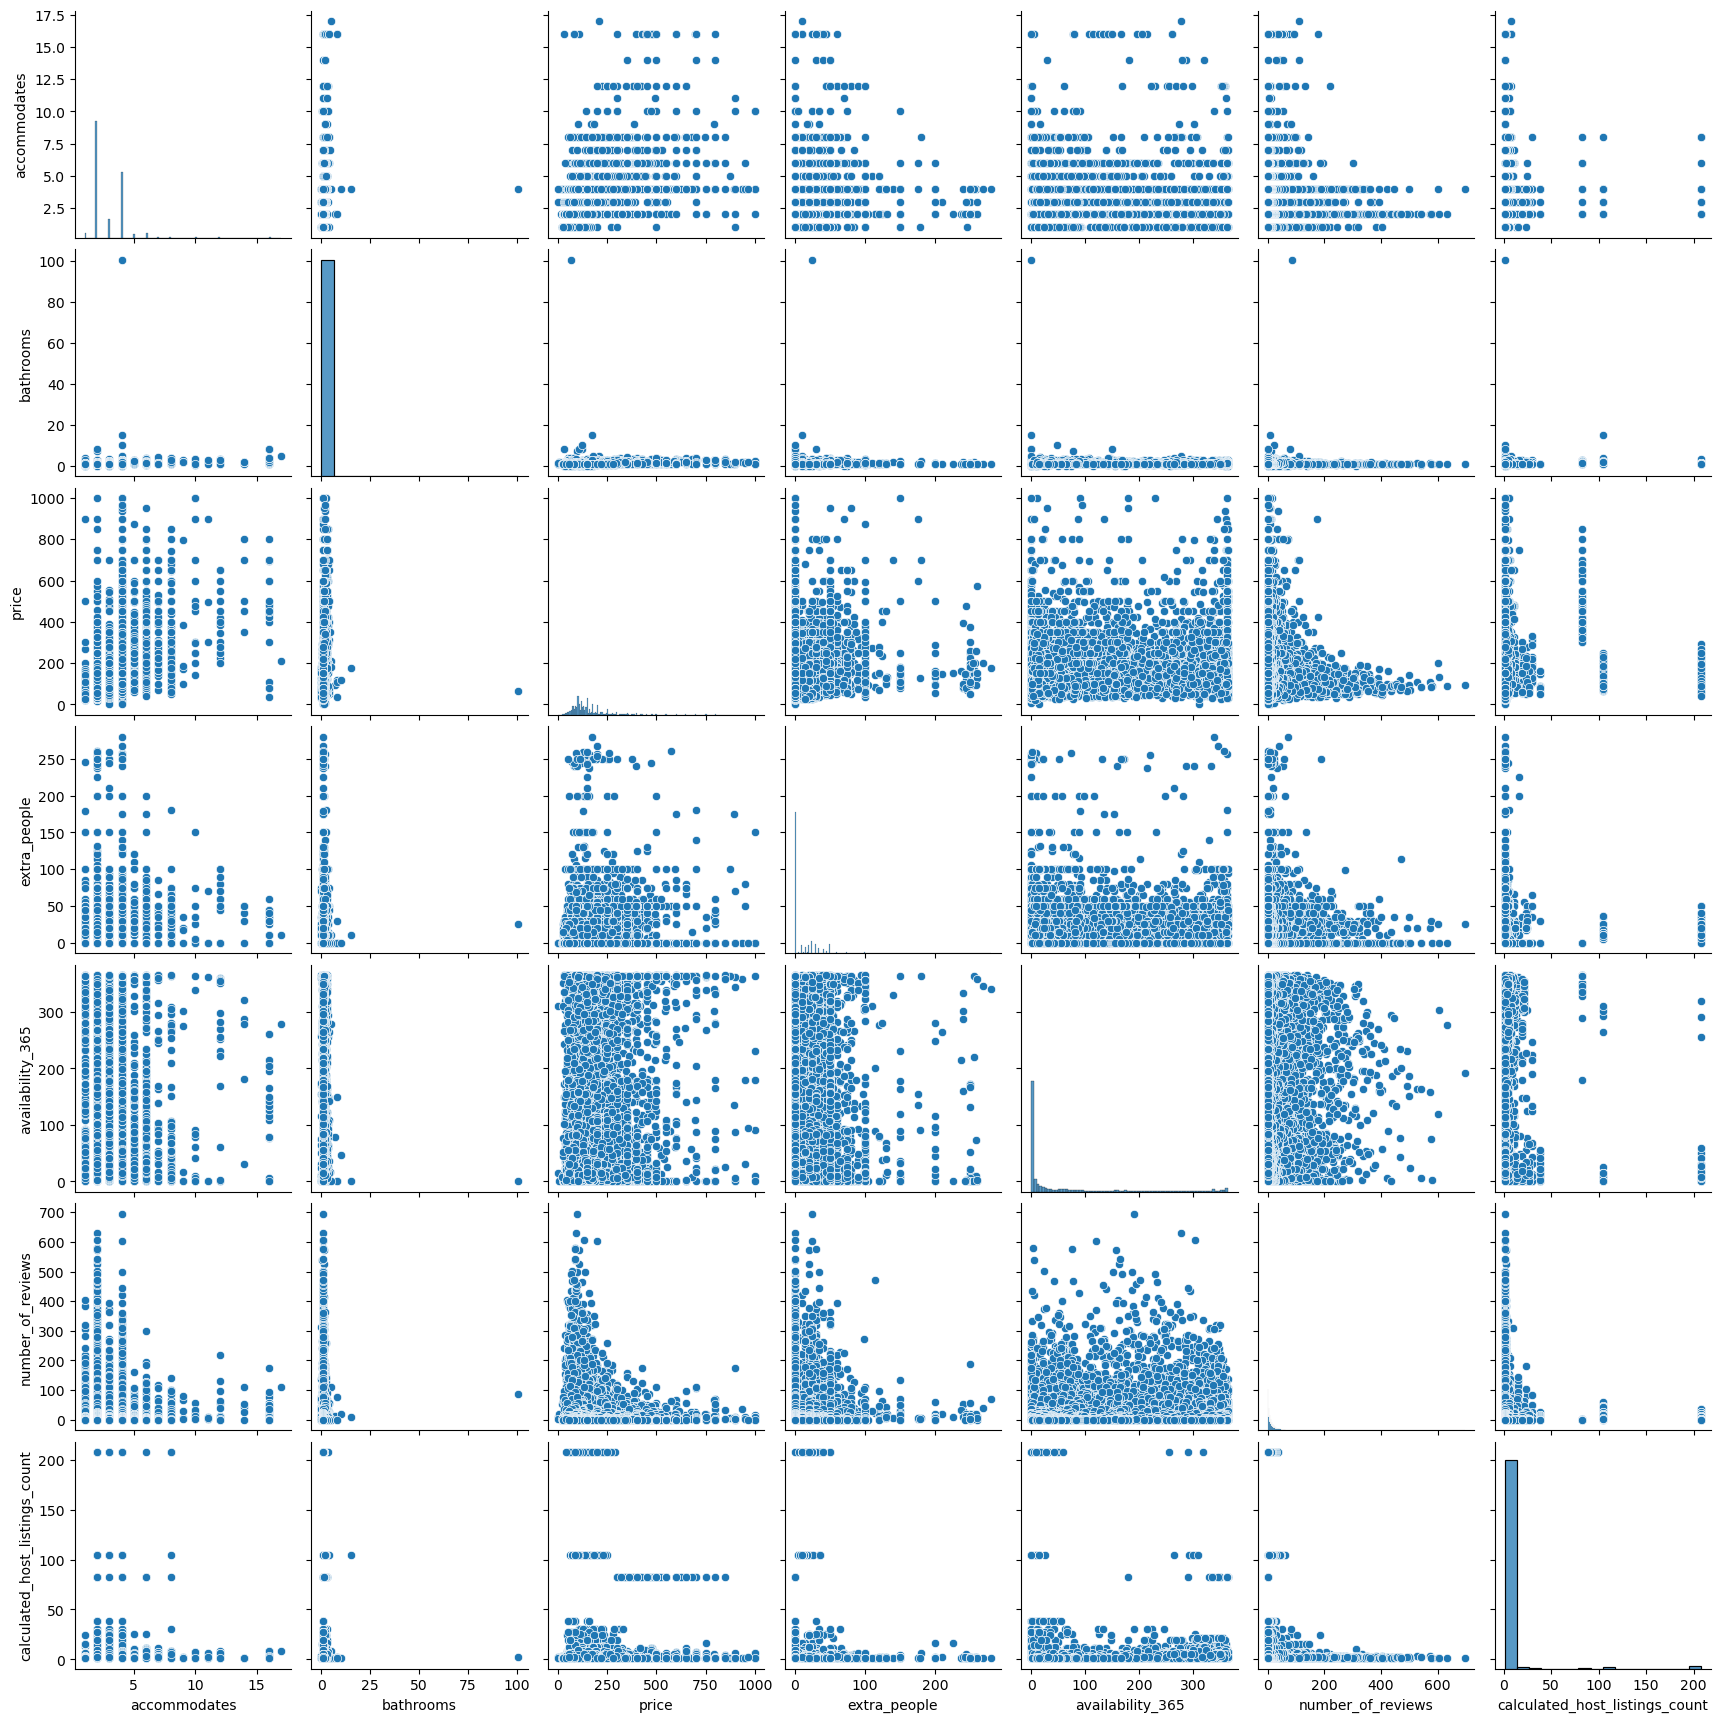

In [12]:
sns.pairplot(pair_sub)

The distributions are similar for most studied variables with a majority of counts at low values that decay rapidly as he vaue increases. The Price distribution is smore similar to a normal distribution when compared to others. The calsulated_host_listings_count and the availability_365 distributions show outliers at higher values, so they would be interesting to look at in more detail to understand where tthese outliers may be coming from.

## 7. Categorical Plot

Text(0.5, 1.0, 'Distribution of number of reviews')

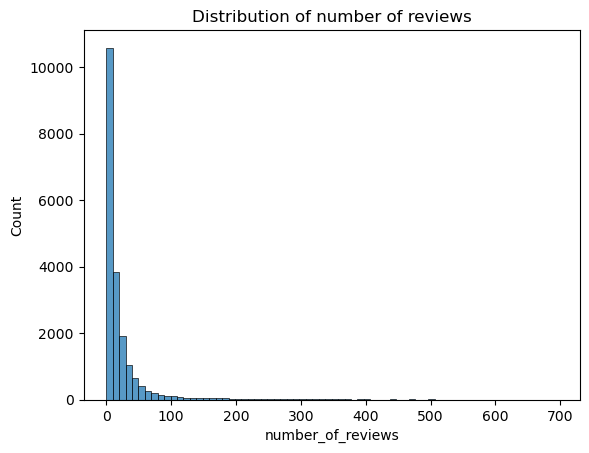

In [28]:
sns.histplot(pair_sub['number_of_reviews'],bins=70)
plt.title('Distribution of number of reviews')

Most listings have under 30 reviews. As expected, the number of listings with high reviews is smaller, for higher review counts. However, there seems to be some outliers with over 400 reviews. We should look to see if these are from very old listings, or from very highly rated listings, or maybe listings in highly popular areas.

Text(0.5, 1.0, 'Distribution of availability for the next 365 days')

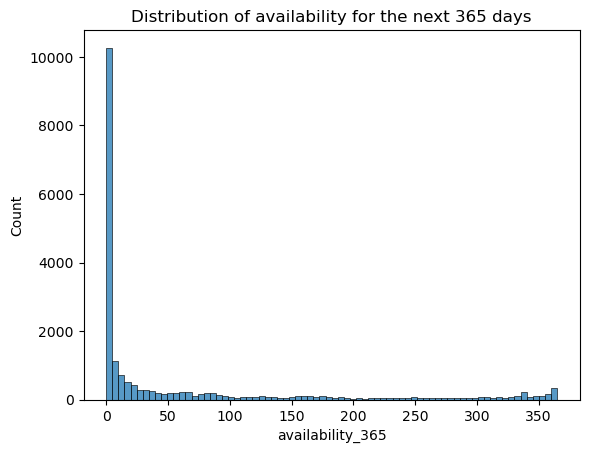

In [29]:
sns.histplot(pair_sub['availability_365'])
plt.title('Distribution of availability for the next 365 days')

Most listings have very little availability for the following year (>50 days), with some small listings haveing over 350 days of availability.

Text(0.5, 1.0, 'Distribution of superhost status')

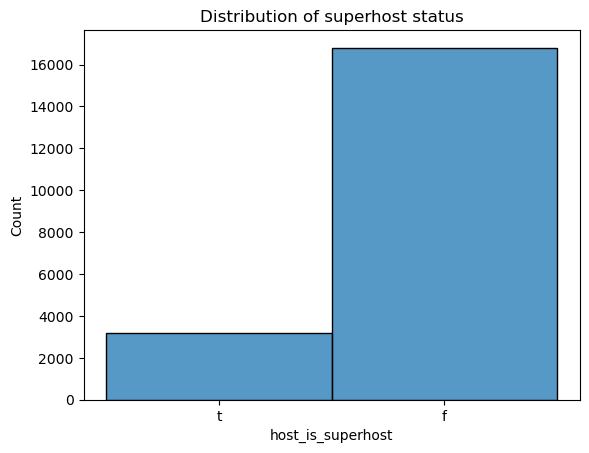

In [35]:
sns.histplot(df_listings['host_is_superhost'])
plt.title('Distribution of superhost status')

Most listings belong to non superhost guests. However, to realy know the count of superhosts, we would have to group the information by host_id, as one host can have multiple listings

Text(0.5, 1.0, 'Listings per neighbourhood')

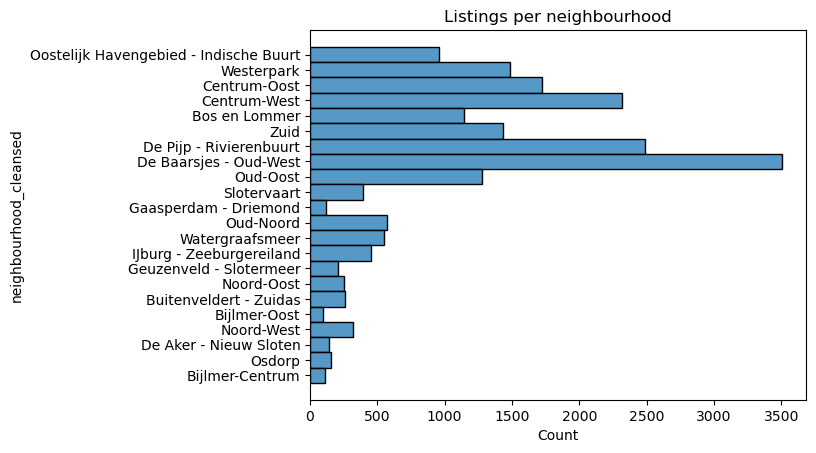

In [39]:
sns.histplot(y=df_listings['neighbourhood_cleansed'])
plt.title('Listings per neighbourhood')

We can see that different neighbourhoods have different amounts of listings. It will be interesting to line this data up with geographical data to map the density of listings throughout Amsterdam.